# Part 2: Resampling and confidence intervall

In [1]:
import numpy as np
import algorithms
from model_selection0 import GridSearchNew #use Gridsearch.fit(x,y)
from model_comparison0 import model_comparison0
from model_resample import model_resample
from utils import generateDesignmatrix, franke_function, ci, plotCI, clean_reg_coeff
from scipy import stats
import scipy.stats as st
import matplotlib.pyplot as plt
from imageio import imread
%matplotlib notebook 
# creates the toolbars with zoom buttons on plots.

## Franke function 

In [2]:
np.random.seed(1000)
x = np.random.rand(1000, )
y = np.random.rand(1000, )
z = franke_function(x, y)
p = 5 
X = generateDesignmatrix(p,x,y)

In [3]:
# Experimental setup
models = {
    'ridge': algorithms.Ridge, 
    "ols": algorithms.OLS, 
    "lasso": algorithms.Lasso
}

lmd = {
    'ridge': [0.01], 
    'ols': [0], 
    'lasso': [0.01]
}
nboots = 100

In [4]:
mse_avg_test, r2_avg_test, reg_coeffs, bias_model_test, mv_test, mse_avg_train, r2_avg_train,  bias_model_train,  mv_train, z_pred_test, z_pred_train, z_test, z_train = model_resample(models, lmd, X, z, nboots, split_size = 0.2)

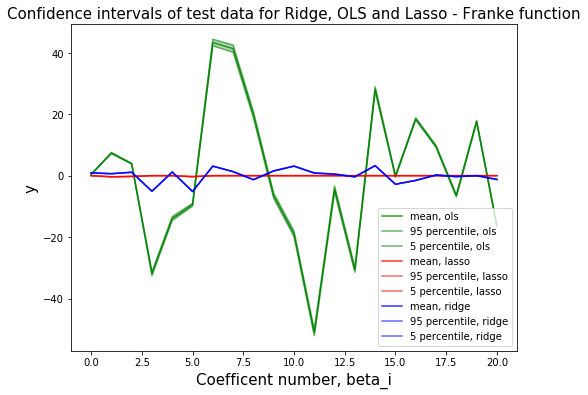

In [5]:
a,b,c, d, e, f, g, h, i = clean_reg_coeff(X, reg_coeffs, nboots)
plotCI(X, a,b,c, d, e, f, g, h, i)
plt.title("Confidence intervals of test data for Ridge, OLS and Lasso - Franke function", fontsize = 15)
plt.savefig("Confidenceintervall_Franke.png")
plt.show()

In [6]:
mse_avg_test, mse_avg_train
# train has a lower value than test. OK!

({'ridge': 0.005135916726187406,
  'lasso': 0.022692245451644784,
  'ols': 0.0020856799507616513},
 {'ridge': 0.005035232691517859,
  'lasso': 0.022559759989916054,
  'ols': 0.001964023169265149})

In [7]:
r2_avg_test, r2_avg_train 
# train is higher than test. OK!

({'ridge': 0.9346392276271341,
  'lasso': 0.711740152212439,
  'ols': 0.9733833181897174},
 {'ridge': 0.9372085691530623,
  'lasso': 0.7186522715197365,
  'ols': 0.9755104355256345})

In [8]:
bias_model_test, bias_model_train

({'ridge': 0.0014001694115274854,
  'ols': 0.001125992646844154,
  'lasso': 0.0005533777916422178},
 {'ridge': 0.0009354519010458806,
  'ols': 0.000923986347527328,
  'lasso': 0.000923986345541139})

In [9]:
mv_test, mv_train

({'ridge': 1.0658141036401502e-16,
  'ols': -1.6209256159527285e-16,
  'lasso': -7.571721027943568e-16},
 {'ridge': 6.16839912481737e-15,
  'ols': -4.0323300254385686e-15,
  'lasso': 5.897504706808831e-15})

In [26]:
# tester bias ridge

print(np.array(z_pred_test['ridge']).shape)

print(np.mean(np.array(z_pred_test['ridge']), axis=1).shape)
z_pred_mean =np.mean(np.array(z_pred_test['ridge']), axis=1)
bias =np.mean(z_test)- np.mean(z_pred_mean) # Ikke samme verdi!!!
print(bias)
bias2 = np.square(bias)



# tester variance ridge
var = np.sum(z_pred_mean - np.mean(z_pred_mean))/z_pred_mean.shape # heller ikke samme verdi

print(np.mean(z_pred_mean))

print(z_pred_mean)


(100, 200)
(100,)
-0.0023976375714295783
0.4074125272545161
[0.409847   0.37635179 0.40042032 0.40267138 0.41964089 0.41770418
 0.39778327 0.3983592  0.38085302 0.40008374 0.38353104 0.40972101
 0.40104477 0.39570898 0.41768721 0.39720042 0.39278632 0.40250644
 0.42419201 0.44181367 0.41384678 0.36285394 0.40349042 0.43701205
 0.40598018 0.3976957  0.40203991 0.39888402 0.4213919  0.420845
 0.43237997 0.37247379 0.40529492 0.40442479 0.41561024 0.41001834
 0.39535237 0.41996997 0.41920659 0.39498162 0.43920921 0.41729509
 0.39630407 0.41472011 0.42677786 0.41750479 0.40451367 0.40206381
 0.43323559 0.39868964 0.40870656 0.39002146 0.42760104 0.37990687
 0.39217734 0.42677359 0.43286965 0.39551578 0.42053151 0.43144674
 0.41583899 0.41508703 0.41524433 0.43786775 0.42014535 0.40702831
 0.42172861 0.42691755 0.42236902 0.39819213 0.39777073 0.42470728
 0.40595527 0.40097401 0.40177864 0.39753964 0.39925932 0.42154199
 0.38275951 0.42277337 0.41449361 0.38634994 0.42626758 0.43700056
 0.3

## Real data: Flekkefjord 

In [11]:
# Experimental setup
models = {
    'ridge': algorithms.Ridge, 
    "ols": algorithms.OLS, 
    "lasso": algorithms.Lasso
}

lmd = {
    'ridge': [0.01], 
    'ols': [0], 
    'lasso': [0.01]
}
nboots = 100

In [12]:
terrain_F = imread("Flekkefjord.tif")

lengthx = 100
lengthy = 100
x = np.linspace(1, lengthx, num=lengthx)
y = np.linspace(1+80, lengthy+80, num=lengthy)

#x = np.arange(lengthx)
#y = np.arange(lengthy)

x = np.squeeze(np.tile(x, [1,100]))
y = np.squeeze(np.tile(y, [1,100]))
z = np.ndarray.flatten(terrain_F)
p = 3 
X = generateDesignmatrix(p, x, y)
print(X.shape)

(10000, 10)


c:\users\nbpst2\appdata\local\programs\python\python37-32\lib\site-packages\imageio\plugins\_tifffile.py:7285: UserWarning: module 'imageio.plugins._tifffile' has no attribute 'decode_packbits'
  Functionality might be degraded or be slow.

  warnings.warn("%s%s" % (e, warn))
c:\users\nbpst2\appdata\local\programs\python\python37-32\lib\site-packages\imageio\plugins\_tifffile.py:7285: UserWarning: module 'imageio.plugins._tifffile' has no attribute 'decode_lzw'
  Functionality might be degraded or be slow.

  warnings.warn("%s%s" % (e, warn))
c:\users\nbpst2\appdata\local\programs\python\python37-32\lib\site-packages\imageio\plugins\_tifffile.py:7285: UserWarning: module 'imageio.plugins._tifffile' has no attribute 'unpack_ints'
  Functionality might be degraded or be slow.

  warnings.warn("%s%s" % (e, warn))
c:\users\nbpst2\appdata\local\programs\python\python37-32\lib\site-packages\imageio\plugins\_tifffile.py:7285: UserWarning: module 'imageio.plugins._tifffile' has no attribute 'r

In [13]:
mse_avg_test, r2_avg_test, reg_coeffs, bias_model_test, mv_test, mse_avg_train, r2_avg_train,  bias_model_train,  mv_train   = model_resample(
    models, lmd, X, z, nboots, split_size = 0.2)

c:\users\nbpst2\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


LinAlgError: singular matrix

In [ ]:
a,b,c, d, e, f, g, h, i = clean_reg_coeff(X, reg_coeffs, nboots)

In [ ]:
%matplotlib notebook
plotCI(X, a,b,c, d, e, f, g, h, i)
plt.title("Confidence intervals Ridge, OLS and Lasso - Flekkefjord", fontsize = 15)
plt.savefig("Confidenceintervall_F.png")
plt.show()

In [ ]:
mse_avg_test, mse_avg_train

In [ ]:
r2_avg_test, r2_avg_train

In [ ]:
bias_model_test, bias_model_train

In [ ]:
# model variance
mv_test, mv_train

## Real data: Montevideo

In [ ]:
terrain_M = imread("Montevideo.tif")

x = np.linspace(1, lengthx, num=lengthx)
y = np.linspace(1+80, lengthy+80, num=lengthy)

#x = np.arange(lengthx)
#y = np.arange(lengthy)

x = np.squeeze(np.tile(x, [1,100]))
y = np.squeeze(np.tile(y, [1,100]))
z = np.ndarray.flatten(terrain_F)
p = 3
X = generateDesignmatrix(p, x, y)
z = np.ndarray.flatten(terrain_M)

#mse_M, r2_M, reg_coeffs_M, bias_M, model_variance_M

mse_avg_test, r2_avg_test, reg_coeffs, bias_model_test, mv_test, mse_avg_train, r2_avg_train,  bias_model_train,  mv_train   = model_resample(
    models, lmd, X, z, nboots, split_size = 0.2)

In [ ]:
a,b,c, d, e, f, g, h, i = clean_reg_coeff(X, reg_coeffs, nboots)
"""
a - mean ridge 
b - ci high 
c - ci lox

2. ols
3. lasso
"""

%matplotlib notebook
plotCI(X, a,b,c, d, e, f, g, h, i)
plt.title("Confidence intervals Ridge, OLS and Lasso - Montevideo", fontsize = 15)
plt.savefig("Confidenceintervall_M.png")
plt.show()

In [ ]:
mse_avg_test, mse_avg_train

In [ ]:
r2_avg_test, r2_avg_train

In [ ]:
bias_model_test, bias_model_train

In [ ]:
mv_test, mv_train